In [24]:
using PyPlot
using Distributions

In [25]:
#--------Data Generation
max_counts= 100
X=linspace(-6,6,15)

linspace(-6.0,6.0,15)

In [26]:
a=1
b=2
FWHM= 5

n0= max_counts/(a+b)

x0= 0
w= FWHM/2.35

m= length(X)

D= zeros(1,m)
N= zeros(1,m)

D =n0 .* (b .+ a .* exp((-1.*(X .- x0).^2)./ 2*w^2))

15-element Array{Float64,1}:
  66.6667
  66.6667
  66.6667
  66.6667
  66.6667
  66.7097
  72.9859
 100.0   
  72.9859
  66.7097
  66.6667
  66.6667
  66.6667
  66.6667
  66.6667

In [27]:
for k = 1:m
    N[k]= rand(Poisson(D[k]))
end
N

1x15 Array{Float64,2}:
 77.0  64.0  73.0  61.0  77.0  74.0  …  62.0  67.0  59.0  71.0  68.0  40.0

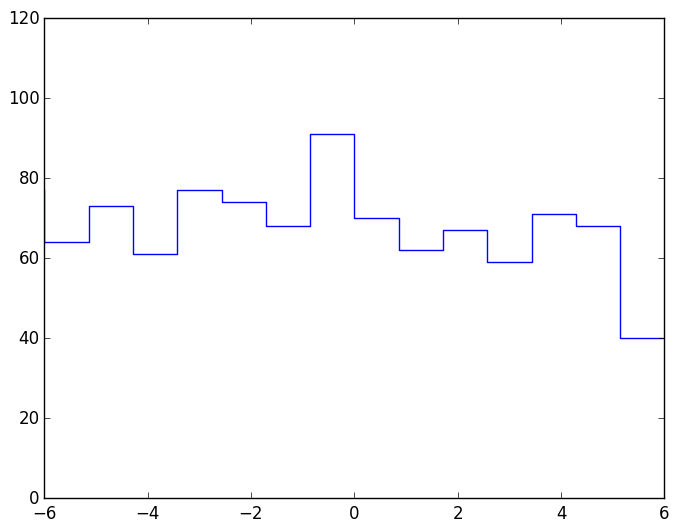

(0,120)

In [28]:
step(X,N')
ax=gca()
ax[:set_ylim](0,120)

In [29]:
A=[0:0.01:3...]
B=[0:0.01:3...]
A_grid= repmat(A',length(B),1)

301x301 Array{Float64,2}:
 0.0  0.01  0.02  0.03  0.04  0.05  …  2.95  2.96  2.97  2.98  2.99  3.0
 0.0  0.01  0.02  0.03  0.04  0.05     2.95  2.96  2.97  2.98  2.99  3.0
 0.0  0.01  0.02  0.03  0.04  0.05     2.95  2.96  2.97  2.98  2.99  3.0
 0.0  0.01  0.02  0.03  0.04  0.05     2.95  2.96  2.97  2.98  2.99  3.0
 0.0  0.01  0.02  0.03  0.04  0.05     2.95  2.96  2.97  2.98  2.99  3.0
 0.0  0.01  0.02  0.03  0.04  0.05  …  2.95  2.96  2.97  2.98  2.99  3.0
 0.0  0.01  0.02  0.03  0.04  0.05     2.95  2.96  2.97  2.98  2.99  3.0
 0.0  0.01  0.02  0.03  0.04  0.05     2.95  2.96  2.97  2.98  2.99  3.0
 0.0  0.01  0.02  0.03  0.04  0.05     2.95  2.96  2.97  2.98  2.99  3.0
 0.0  0.01  0.02  0.03  0.04  0.05     2.95  2.96  2.97  2.98  2.99  3.0
 0.0  0.01  0.02  0.03  0.04  0.05  …  2.95  2.96  2.97  2.98  2.99  3.0
 0.0  0.01  0.02  0.03  0.04  0.05     2.95  2.96  2.97  2.98  2.99  3.0
 0.0  0.01  0.02  0.03  0.04  0.05     2.95  2.96  2.97  2.98  2.99  3.0
 ⋮                       

In [30]:
B_grid = repmat(B,1,length(A))

301x301 Array{Float64,2}:
 0.0   0.0   0.0   0.0   0.0   0.0   …  0.0   0.0   0.0   0.0   0.0   0.0 
 0.01  0.01  0.01  0.01  0.01  0.01     0.01  0.01  0.01  0.01  0.01  0.01
 0.02  0.02  0.02  0.02  0.02  0.02     0.02  0.02  0.02  0.02  0.02  0.02
 0.03  0.03  0.03  0.03  0.03  0.03     0.03  0.03  0.03  0.03  0.03  0.03
 0.04  0.04  0.04  0.04  0.04  0.04     0.04  0.04  0.04  0.04  0.04  0.04
 0.05  0.05  0.05  0.05  0.05  0.05  …  0.05  0.05  0.05  0.05  0.05  0.05
 0.06  0.06  0.06  0.06  0.06  0.06     0.06  0.06  0.06  0.06  0.06  0.06
 0.07  0.07  0.07  0.07  0.07  0.07     0.07  0.07  0.07  0.07  0.07  0.07
 0.08  0.08  0.08  0.08  0.08  0.08     0.08  0.08  0.08  0.08  0.08  0.08
 0.09  0.09  0.09  0.09  0.09  0.09     0.09  0.09  0.09  0.09  0.09  0.09
 0.1   0.1   0.1   0.1   0.1   0.1   …  0.1   0.1   0.1   0.1   0.1   0.1 
 0.11  0.11  0.11  0.11  0.11  0.11     0.11  0.11  0.11  0.11  0.11  0.11
 0.12  0.12  0.12  0.12  0.12  0.12     0.12  0.12  0.12  0.12  0.12  0.12

In [31]:
# Posterior calculations: 1- Calculate D
count=0;
D =zeros(length(A)*length(B),m)
D_gKnowB =zeros(length(A)*length(B),m)
for i = 1: length(A), j=1:length(B)
    count= count+1
    D[count,:] =n0*(A_grid[i,j] * exp(-(X .- x0).^2 / 2*w^2) .+ B_grid[i,j])
    D_gKnowB[count,:] =n0*(A_grid[i,j] * exp(-(X .- x0).^2 / 2*w^2) .+ 2)
end
D

90601x15 Array{Float64,2}:
   0.0            0.0            0.0          …    0.0            0.0        
   1.3629e-36     3.33601e-27    2.93471e-19       3.33601e-27    1.3629e-36 
   2.7258e-36     6.67202e-27    5.86942e-19       6.67202e-27    2.7258e-36 
   4.08871e-36    1.0008e-26     8.80413e-19       1.0008e-26     4.08871e-36
   5.45161e-36    1.3344e-26     1.17388e-18       1.3344e-26     5.45161e-36
   6.81451e-36    1.66801e-26    1.46736e-18  …    1.66801e-26    6.81451e-36
   8.17741e-36    2.00161e-26    1.76083e-18       2.00161e-26    8.17741e-36
   9.54031e-36    2.33521e-26    2.0543e-18        2.33521e-26    9.54031e-36
   1.09032e-35    2.66881e-26    2.34777e-18       2.66881e-26    1.09032e-35
   1.22661e-35    3.00241e-26    2.64124e-18       3.00241e-26    1.22661e-35
   1.3629e-35     3.33601e-26    2.93471e-18  …    3.33601e-26    1.3629e-35 
   1.49919e-35    3.66961e-26    3.22818e-18       3.66961e-26    1.49919e-35
   1.63548e-35    4.00321e-26    3.52

In [32]:
#2- Calculate L
L= zeros(1,length(A)*length(B))
L_gKnowB= zeros(1,length(A)*length(B))

L= sum((N .*log(D) .- D),2)
L_gKnowB= sum((N .*log(D_gKnowB) .- D_gKnowB),2)

90601x1 Array{Float64,2}:
 3292.1 
 3292.22
 3292.35
 3292.47
 3292.58
 3292.7 
 3292.81
 3292.92
 3293.03
 3293.14
 3293.24
 3293.35
 3293.45
    ⋮   
 3274.01
 3273.84
 3273.67
 3273.5 
 3273.33
 3273.15
 3272.98
 3272.81
 3272.63
 3272.46
 3272.28
 3272.11

In [33]:
#3- Calculate Posterior
getMaxL= maximum(L);
modifiedL= L .- getMaxL;
posterior = exp(modifiedL)

getMaxL_gKnowB= maximum(L_gKnowB);
modifiedL_gKnowB= L_gKnowB .- getMaxL_gKnowB;
posterior_gKnowB = exp(modifiedL_gKnowB)

90601x1 Array{Float64,2}:
 0.0183883  
 0.0208348  
 0.0235508  
 0.0265583  
 0.0298801  
 0.0335398  
 0.0375617  
 0.0419706  
 0.0467918  
 0.0520509  
 0.0577735  
 0.0639853  
 0.0707117  
 ⋮          
 2.57485e-10
 2.1698e-10 
 1.82763e-10
 1.53873e-10
 1.29491e-10
 1.08923e-10
 9.1581e-11 
 7.69657e-11
 6.46541e-11
 5.42877e-11
 4.55633e-11
 3.82241e-11

In [34]:
# Plot configurations
posterior_grid= zeros(length(A),length(B))
posterior_grid = reshape(posterior, length(A), length(B))

posterior_grid_gKnowB= zeros(length(A),length(B))
posterior_grid_gKnowB = reshape(posterior_gKnowB, length(A), length(B))

301x301 Array{Float64,2}:
 0.0183883    0.0183883    0.0183883    …  0.0183883    0.0183883  
 0.0208348    0.0208348    0.0208348       0.0208348    0.0208348  
 0.0235508    0.0235508    0.0235508       0.0235508    0.0235508  
 0.0265583    0.0265583    0.0265583       0.0265583    0.0265583  
 0.0298801    0.0298801    0.0298801       0.0298801    0.0298801  
 0.0335398    0.0335398    0.0335398    …  0.0335398    0.0335398  
 0.0375617    0.0375617    0.0375617       0.0375617    0.0375617  
 0.0419706    0.0419706    0.0419706       0.0419706    0.0419706  
 0.0467918    0.0467918    0.0467918       0.0467918    0.0467918  
 0.0520509    0.0520509    0.0520509       0.0520509    0.0520509  
 0.0577735    0.0577735    0.0577735    …  0.0577735    0.0577735  
 0.0639853    0.0639853    0.0639853       0.0639853    0.0639853  
 0.0707117    0.0707117    0.0707117       0.0707117    0.0707117  
 ⋮                                      ⋱               ⋮          
 2.57485e-10  2.57485e

In [86]:
#Plot contour and Histogram
#fig= figure(figsize=(5,4))
subplot(221)
plotHist= step(X,N')
ax=gca()
ax[:set_ylim](0,120)
ylabel("Number of counts N");
xlabel("Measurement variable X");
title("Histogram Plot")


#figure(figsize=(5,4))
subplot(222)
contour(A_grid, B_grid, posterior_grid', levels=[0.10,0.30,0.50,0.70,0.90])
xlabel("Amplitude (A)") 
ylabel("Background (B)")
title("Contour Plot")


LoadError: LoadError: KeyError: set_theta_zero_location not found
while loading In[86], in expression starting on line 5

In [73]:
integration_A= sum(posterior_grid',1)
integration_A_gKnowB= sum(posterior_grid_gKnowB',1)./maximum(integration_A)

1x301 Array{Float64,2}:
 0.345969  0.391999  0.4431  0.499685  …  1.0214e-9  8.57257e-10  7.19173e-10

In [74]:
integration_B= sum(posterior_grid',2)

301x1 Array{Float64,2}:
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 ⋮          
 3.49834e-31
 7.91683e-32
 1.77051e-32
 3.91321e-33
 8.54851e-34
 1.84587e-34
 3.94e-35   
 8.31396e-36
 1.73447e-36
 3.57772e-37
 7.29717e-38
 1.47178e-38

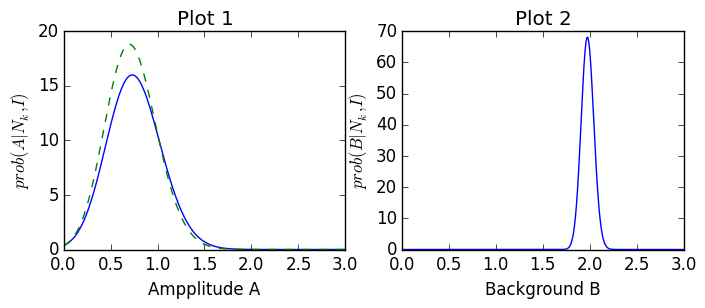

PyObject <matplotlib.text.Text object at 0x000000002BC360F0>

In [82]:
#figure(figsize=(5,4))
pl= PyPlot
pl.subplot(221)
pl.plot(A,integration_A')
pl.plot(A,integration_A_gKnowB',"--")
ylabel("\$prob(A|{N_k},I)\$");
xlabel("Ampplitude A");
title("Plot 1")

#figure(figsize=(5,4))
pl.subplot(222)
pl.plot(B,integration_B)
ylabel("\$prob(B|{N_k},I)\$");
xlabel("Background B");
title("Plot 2")

In [43]:
?plot

search: 

Plot lines and/or markers to the
:class:`~matplotlib.axes.Axes`.  *args* is a variable length
argument, allowing for multiple *x*, *y* pairs with an
optional format string.  For example, each of the following is
legal::

    plot(x, y)        # plot x and y using default line style and color
    plot(x, y, 'bo')  # plot x and y using blue circle markers
    plot(y)           # plot y using x as index array 0..N-1
    plot(y, 'r+')     # ditto, but with red plusses

If *x* and/or *y* is 2-dimensional, then the corresponding columns
will be plotted.

An arbitrary number of *x*, *y*, *fmt* groups can be
specified, as in::

    a.plot(x1, y1, 'g^', x2, y2, 'g-')

Return value is a list of lines that were added.

By default, each line is assigned a different color specified by a
'color cycle'.  To change this behavior, you can edit the
axes.color_cycle rcParam.

The following format string characters are accepted to control
the line style or marker:

================    ====================

plot plot3D plotfile plotHist plot_date plot_trisurf plot_surface



In [80]:
?subplot

search:


    Return a subplot axes positioned by the given grid definition.

    Typical call signature::

      subplot(nrows, ncols, plot_number)

    Where *nrows* and *ncols* are used to notionally split the figure
    into ``nrows * ncols`` sub-axes, and *plot_number* is used to identify
    the particular subplot that this function is to create within the notional
    grid. *plot_number* starts at 1, increments across rows first and has a
    maximum of ``nrows * ncols``.

    In the case when *nrows*, *ncols* and *plot_number* are all less than 10,
    a convenience exists, such that the a 3 digit number can be given instead,
    where the hundreds represent *nrows*, the tens represent *ncols* and the
    units represent *plot_number*. For instance::

      subplot(211)

    produces a subaxes in a figure which represents the top plot (i.e. the
    first) in a 2 row by 1 column notional grid (no grid actually exists,
    but conceptually this is how the returned subplot has been positio

 subplot subplots subplot_tool subplot2grid subplots_adjust

